In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer



In [92]:

# Cargar el archivo CSV
file_path = 'diabetes.csv'
diabetes_data = pd.read_csv(file_path)

diabetes_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [93]:
# Calcular estadísticas descriptivas
descriptive_stats = diabetes_data.describe()

# Mostrar las estadísticas descriptivas
descriptive_stats


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


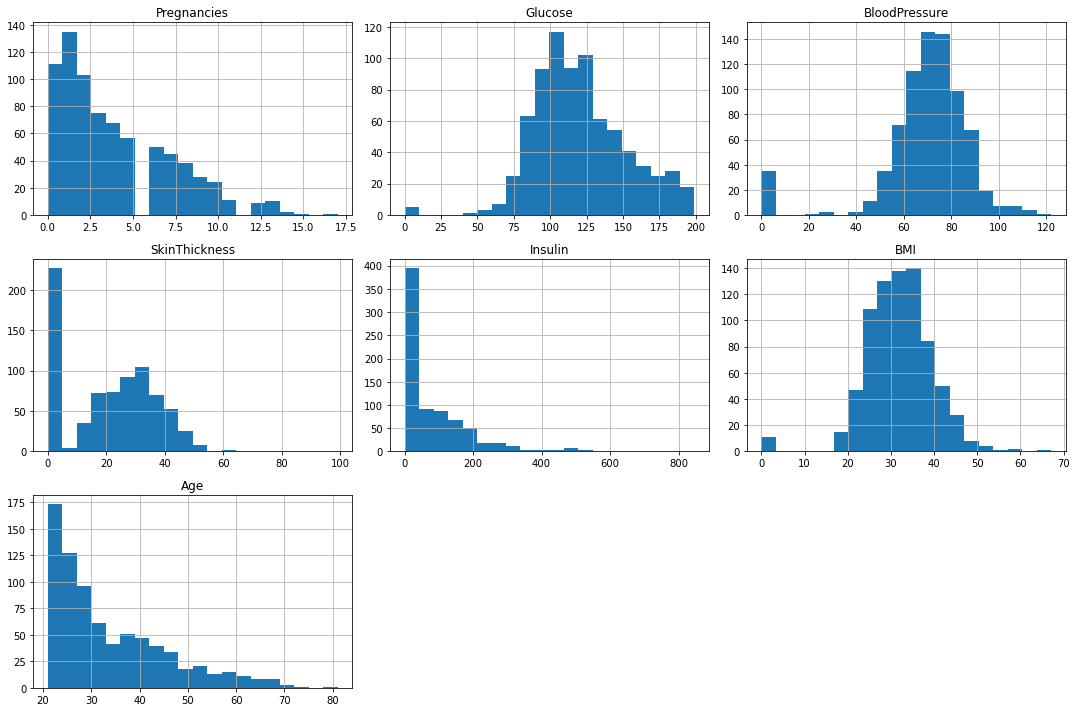

In [94]:

# Lista de columnas principales a visualizar
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

# Crear histogramas para cada columna
diabetes_data[columns].hist(figsize=(15, 10), bins=20, layout=(3, 3))

# Mostrar los gráficos
plt.tight_layout()
plt.show()


In [95]:

# Variables que no pueden tener valores de 0 y donde se tratarán como valores faltantes
columns_to_replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Reemplazar los valores de 0 por NaN en las columnas seleccionadas
diabetes_data[columns_to_replace_zero] = diabetes_data[columns_to_replace_zero].replace(0, np.nan)

# Imputación usando la mediana para las variables numéricas (una opción común para datos faltantes)
imputer = SimpleImputer(strategy='median')
diabetes_data[columns_to_replace_zero] = imputer.fit_transform(diabetes_data[columns_to_replace_zero])

# Revisar si se han reemplazado correctamente los valores de 0 y se ha imputado
diabetes_data[columns_to_replace_zero].isnull().sum()


Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

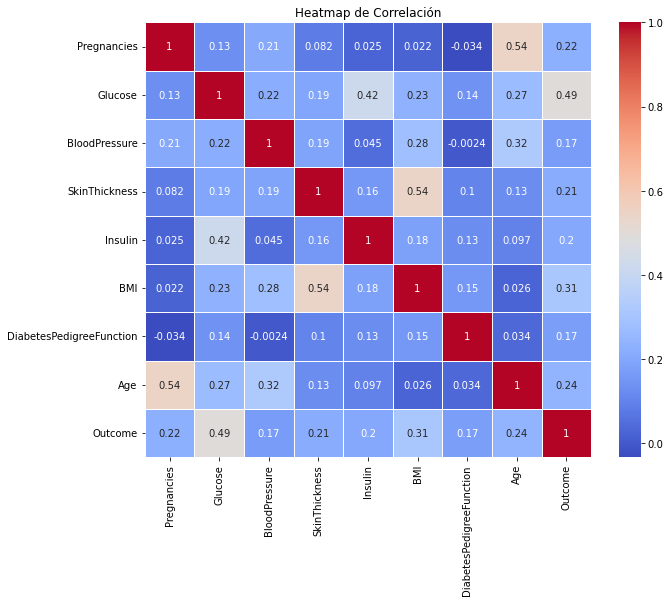

In [96]:

# Calcular la matriz de correlación
correlation_matrix = diabetes_data.corr()

# Configurar el gráfico de correlación (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlación')
plt.show()


In [97]:

# Separar las variables independientes (X) de la variable objetivo (y)
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de regresión logística
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logistic_model.predict(X_test_scaled)

# Obtener el reporte de clasificación
classification_report_result = classification_report(y_test, y_pred)

# Mostrar el reporte de clasificación
classification_report_result


'              precision    recall  f1-score   support\n\n           0       0.75      0.82      0.78       100\n           1       0.60      0.50      0.55        54\n\n    accuracy                           0.71       154\n   macro avg       0.68      0.66      0.67       154\nweighted avg       0.70      0.71      0.70       154\n'

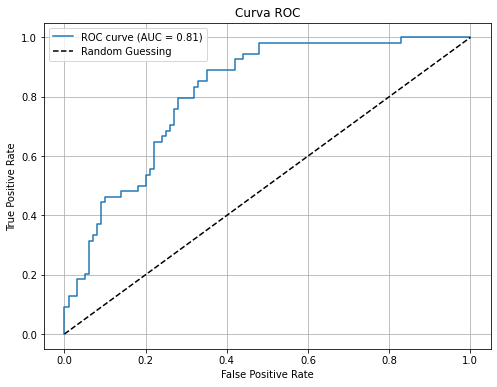

In [98]:
# Calcular las probabilidades predichas para el conjunto de prueba
y_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Calcular la curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [99]:

# Definir el espacio de hiperparámetros para la regresión logística
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularización
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2']
}

# Configurar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo con los mejores hiperparámetros
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_

# Entrenar nuevamente el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_

# Realizar predicciones y evaluar el rendimiento
y_pred_best = best_model.predict(X_test_scaled)
classification_report_best = classification_report(y_test, y_pred_best)

# Mostrar los mejores hiperparámetros y el nuevo reporte de clasificación
best_params, classification_report_best


({'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'},
 '              precision    recall  f1-score   support\n\n           0       0.75      0.82      0.78       100\n           1       0.60      0.50      0.55        54\n\n    accuracy                           0.71       154\n   macro avg       0.68      0.66      0.67       154\nweighted avg       0.70      0.71      0.70       154\n')